# FINAL PROJECT - Bank Marketing Analysis
## Prediction of Subscription


 ##Input variables:
   # bank client data:
   1 - age (numeric)
   2 - job : type of job (categorical: "admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed","unknown")
   3 - marital : marital status (categorical: "divorced","married","single","unknown"; note: "divorced" means divorced or widowed)
   4 - education (categorical: "basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree","unknown")
   5 - default: has credit in default? (categorical: "no","yes","unknown")
   6 - housing: has housing loan? (categorical: "no","yes","unknown")
   7 - loan: has personal loan? (categorical: "no","yes","unknown")

   # related with the last contact of the current campaign:
   8 - contact: contact communication type (categorical: "cellular","telephone") 
   9 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  10 - day_of_week: last contact day of the week (categorical: "mon","tue","wed","thu","fri")
  11 - duration: last contact duration, in seconds (numeric). Important note:  this attribute highly affects the output target (e.g., if duration=0 then y="no"). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
   
   # other attributes:
  12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
  14 - previous: number of contacts performed before this campaign and for this client (numeric)
  15 - poutcome: outcome of the previous marketing campaign (categorical: "failure","nonexistent","success")
   
   # social and economic context attributes
  16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
  17 - cons.price.idx: consumer price index - monthly indicator (numeric)     
  18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)     
  19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
  20 - nr.employed: number of employees - quarterly indicator (numeric)

  Output variable (desired target):
  21 - y - has the client subscribed a term deposit? (binary: "yes","no")


### Import Library

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams

### Load Dataset

In [2]:
data = pd.read_csv('bank-additional-full.csv',sep=";")

### Data Understanding

In [3]:
#Cek 5 data teratas
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
data.duplicated().sum()

12

In [8]:
data.drop_duplicates(inplace=True)

### Proportion client subscribed or not

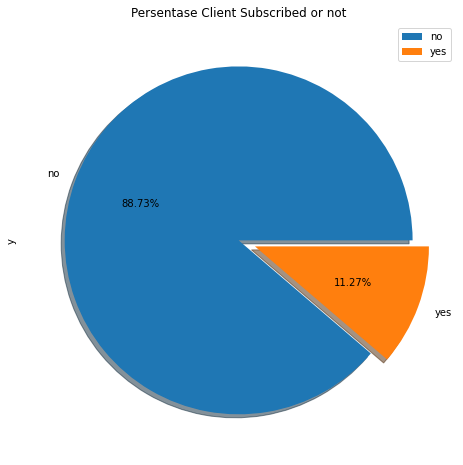

In [9]:
# Original data
plt.figure(figsize=(8,8))
data['y'].value_counts().plot.pie(shadow=True, explode = [0,0.1],autopct='%1.2f%%')
plt.title("Persentase Client Subscribed or not")
plt.legend()
plt.show()

### Correlation

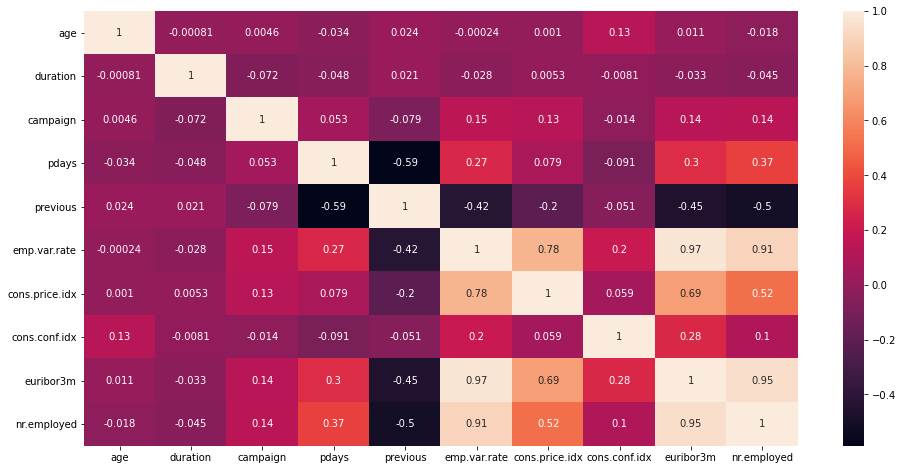

In [10]:
plt.figure(figsize=(16, 8))
sns.heatmap(data.corr(), annot=True)
plt.show()

<Figure size 1440x1080 with 0 Axes>

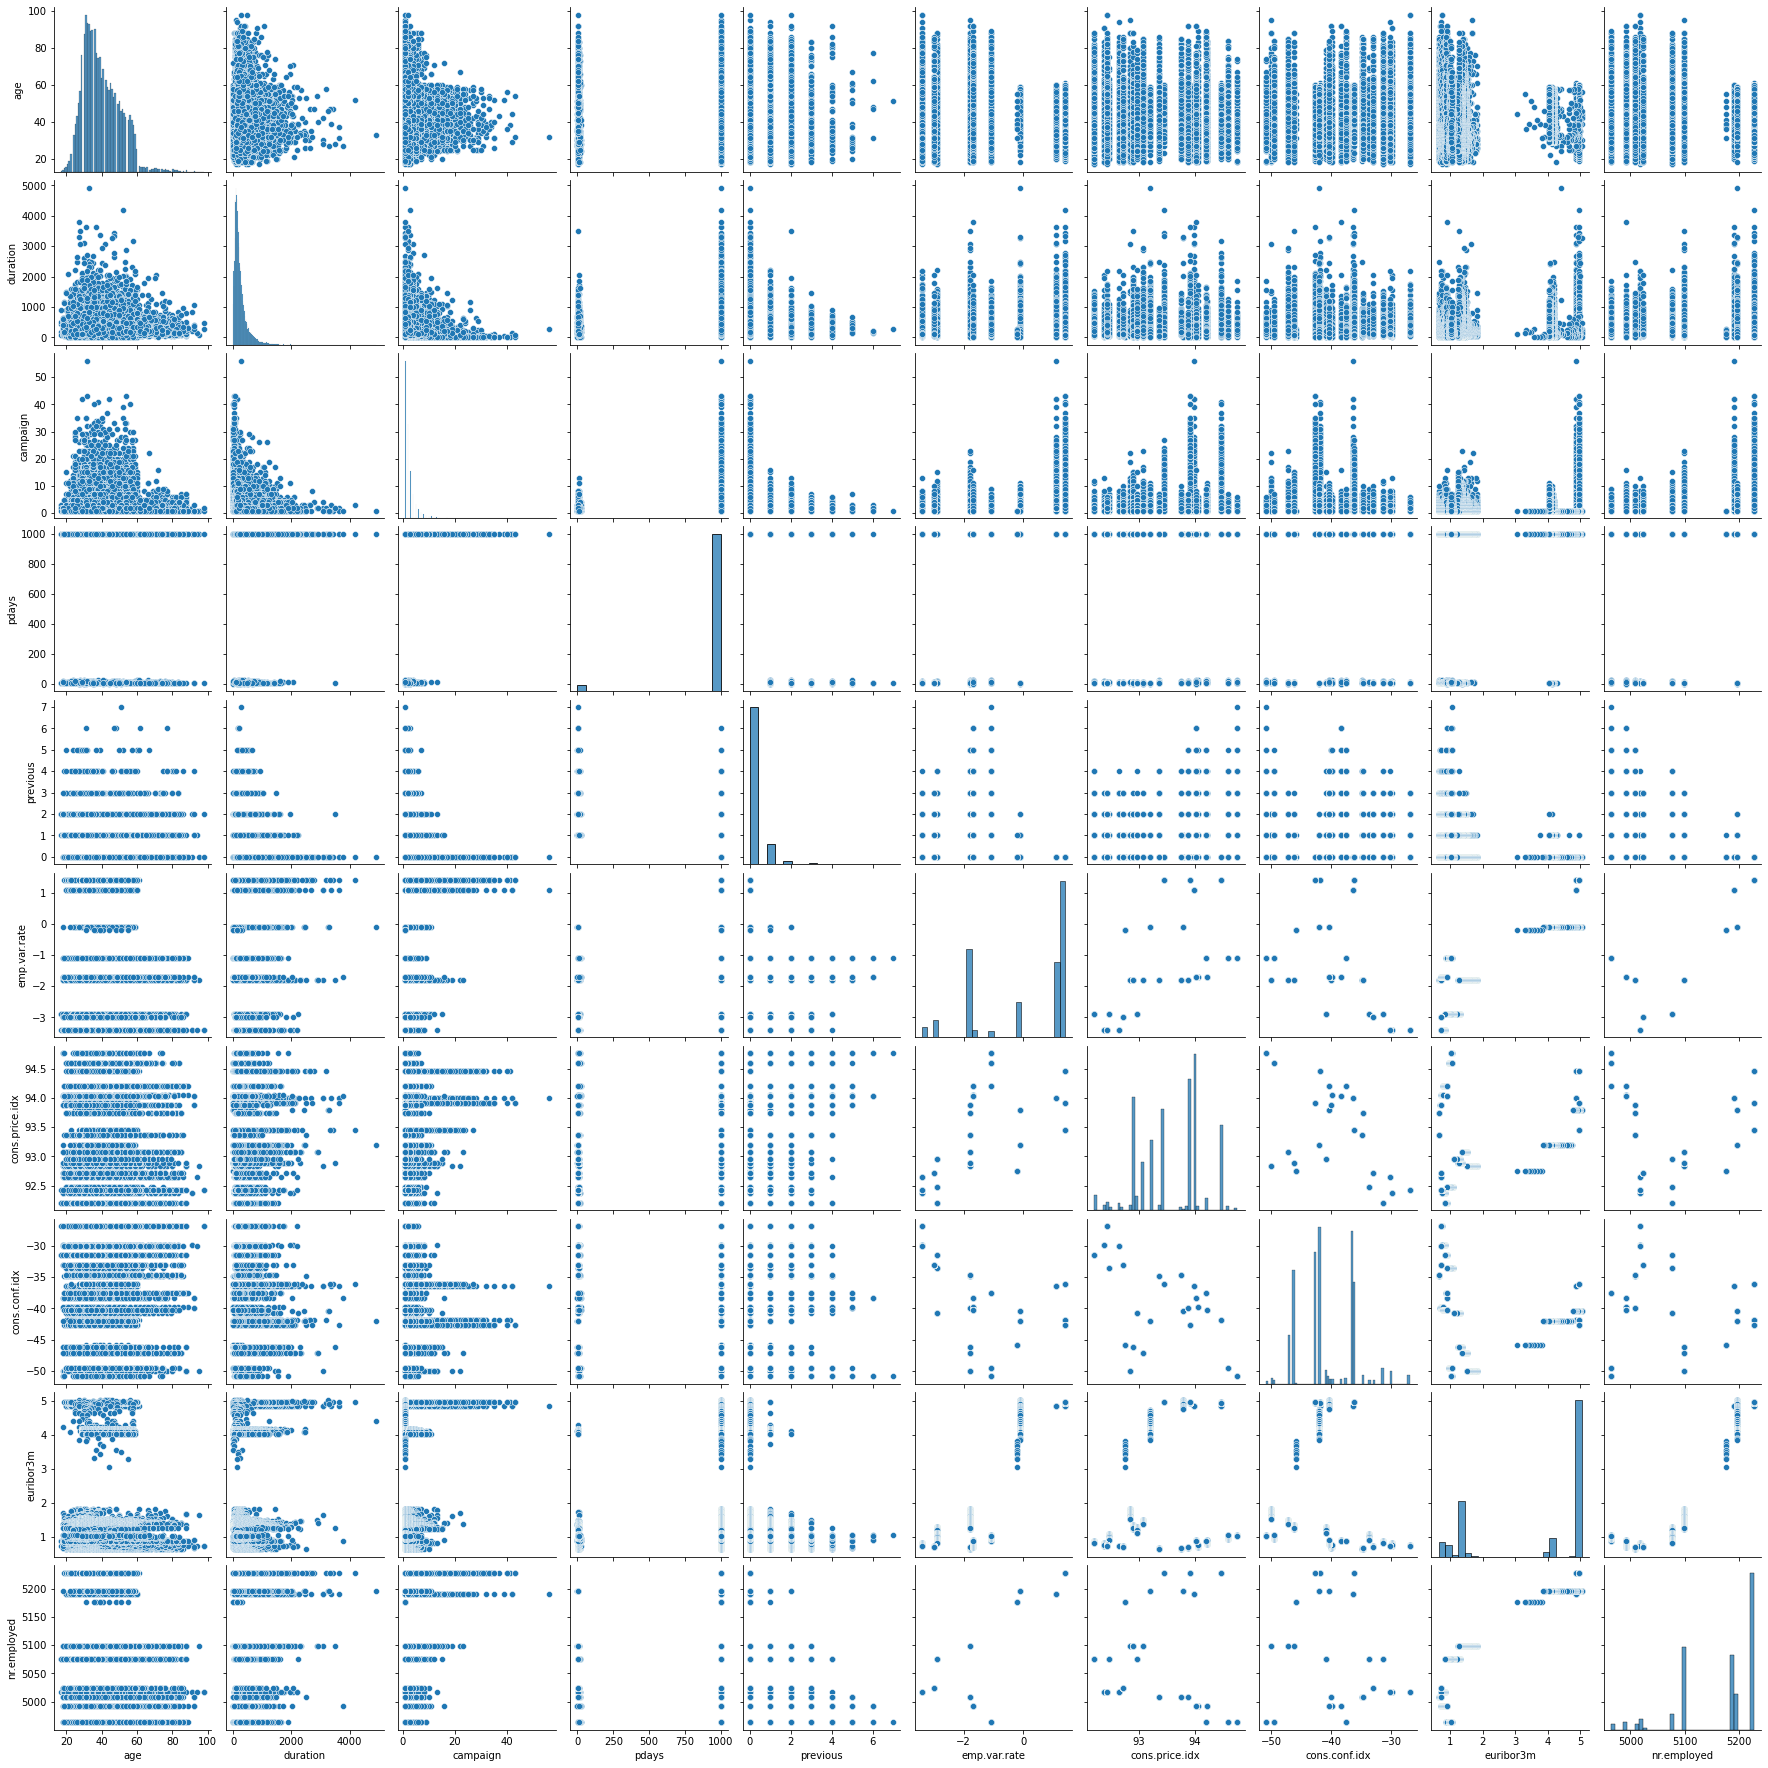

In [11]:
plt.figure(figsize=(20,15))
sns.pairplot(data=data)
plt.show()

## Data Preprocessing

### Data Type Correction

In [11]:
data["nr.employed"]=data["nr.employed"].astype("int64")

In [12]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    data.loc[data['age'] <= 32, 'age'] = 1
    data.loc[(data['age'] > 32) & (data['age'] <= 47), 'age'] = 2
    data.loc[(data['age'] > 47) & (data['age'] <= 70), 'age'] = 3
    data.loc[(data['age'] > 70) & (data['age'] <= 98), 'age'] = 4
           
    return dataframe

age(data);

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41176 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

### Datatype Num_Cols distribution

In [14]:
Num_cols = [col for col, dtype in data.dtypes.items() if dtype == 'int64' or dtype == 'float64']

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`. Using 1.5 for `bw_method`, but please see the docs for the new parameters and update your code.
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:1659: FutureWarning: The `bw` parameter is deprecat

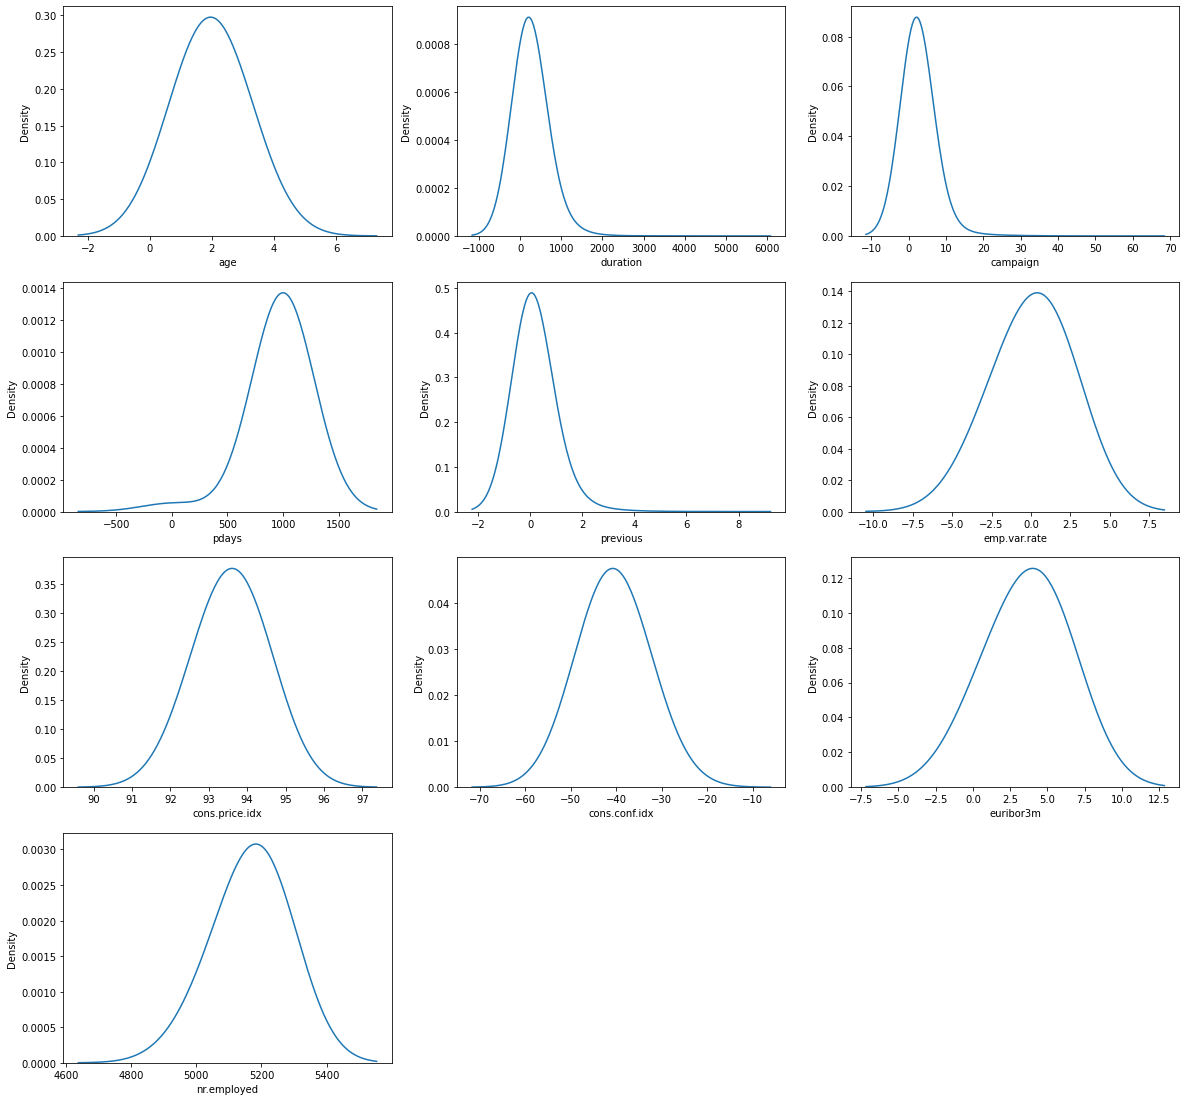

In [15]:
# Original Data (check distribution)
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for Num_col in Num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.kdeplot(data[Num_col], bw=1.5)
    plt.xlabel(Num_col)
    plotnumber+=1
plt.show()

### Outlier Check

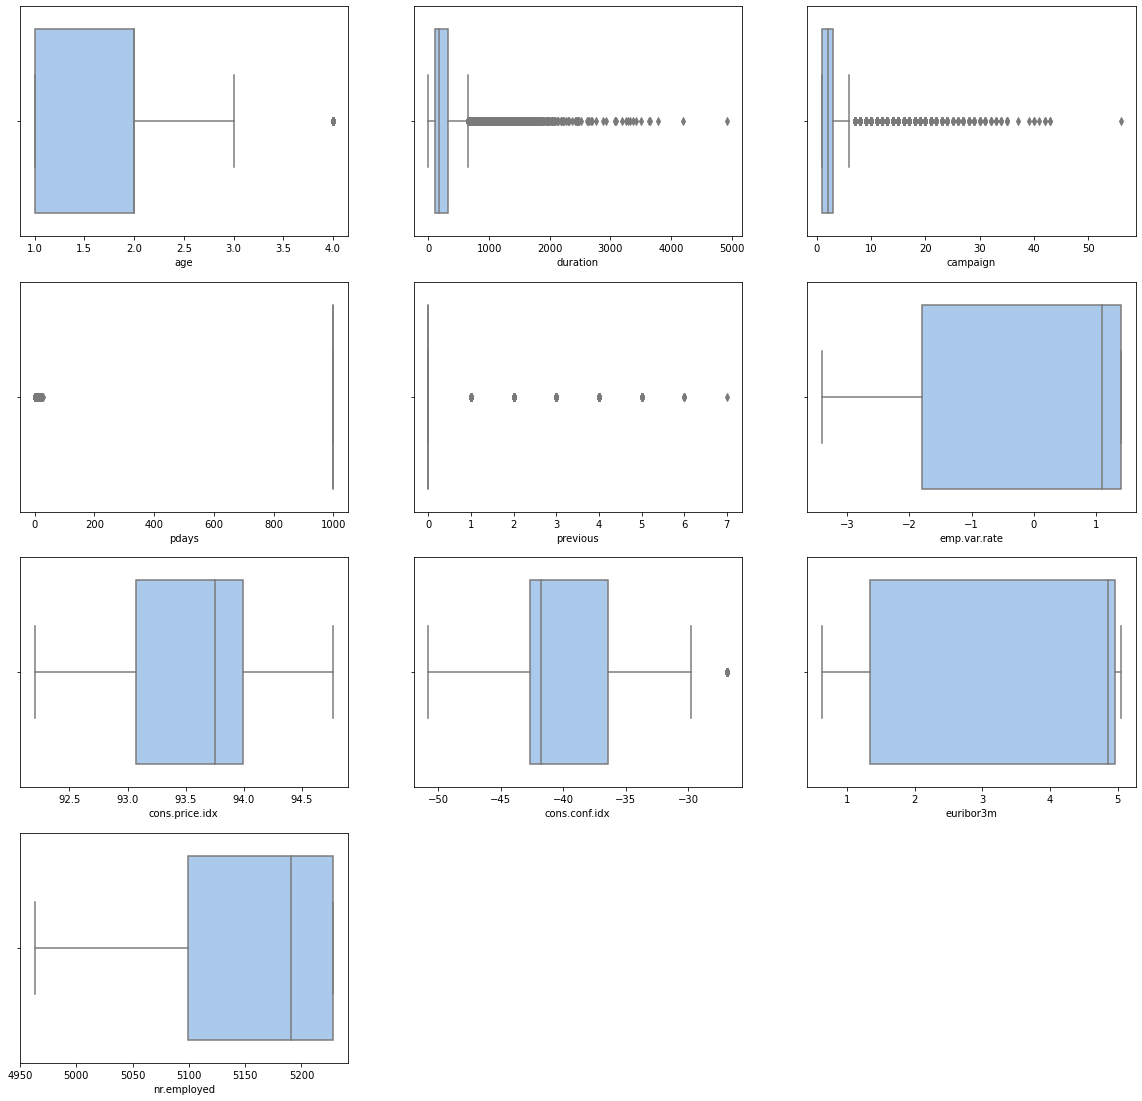

In [16]:
plt.figure(figsize=(20,60))
plotnumber =1
for num_col in Num_cols:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data = data, x = num_col, palette='pastel')
    plt.xlabel(num_col)
    plotnumber+=1
plt.show()

### Data Distribution On Category Class

In [17]:
cat_features = [col for col, dtype in data.dtypes.items() if dtype == 'object']

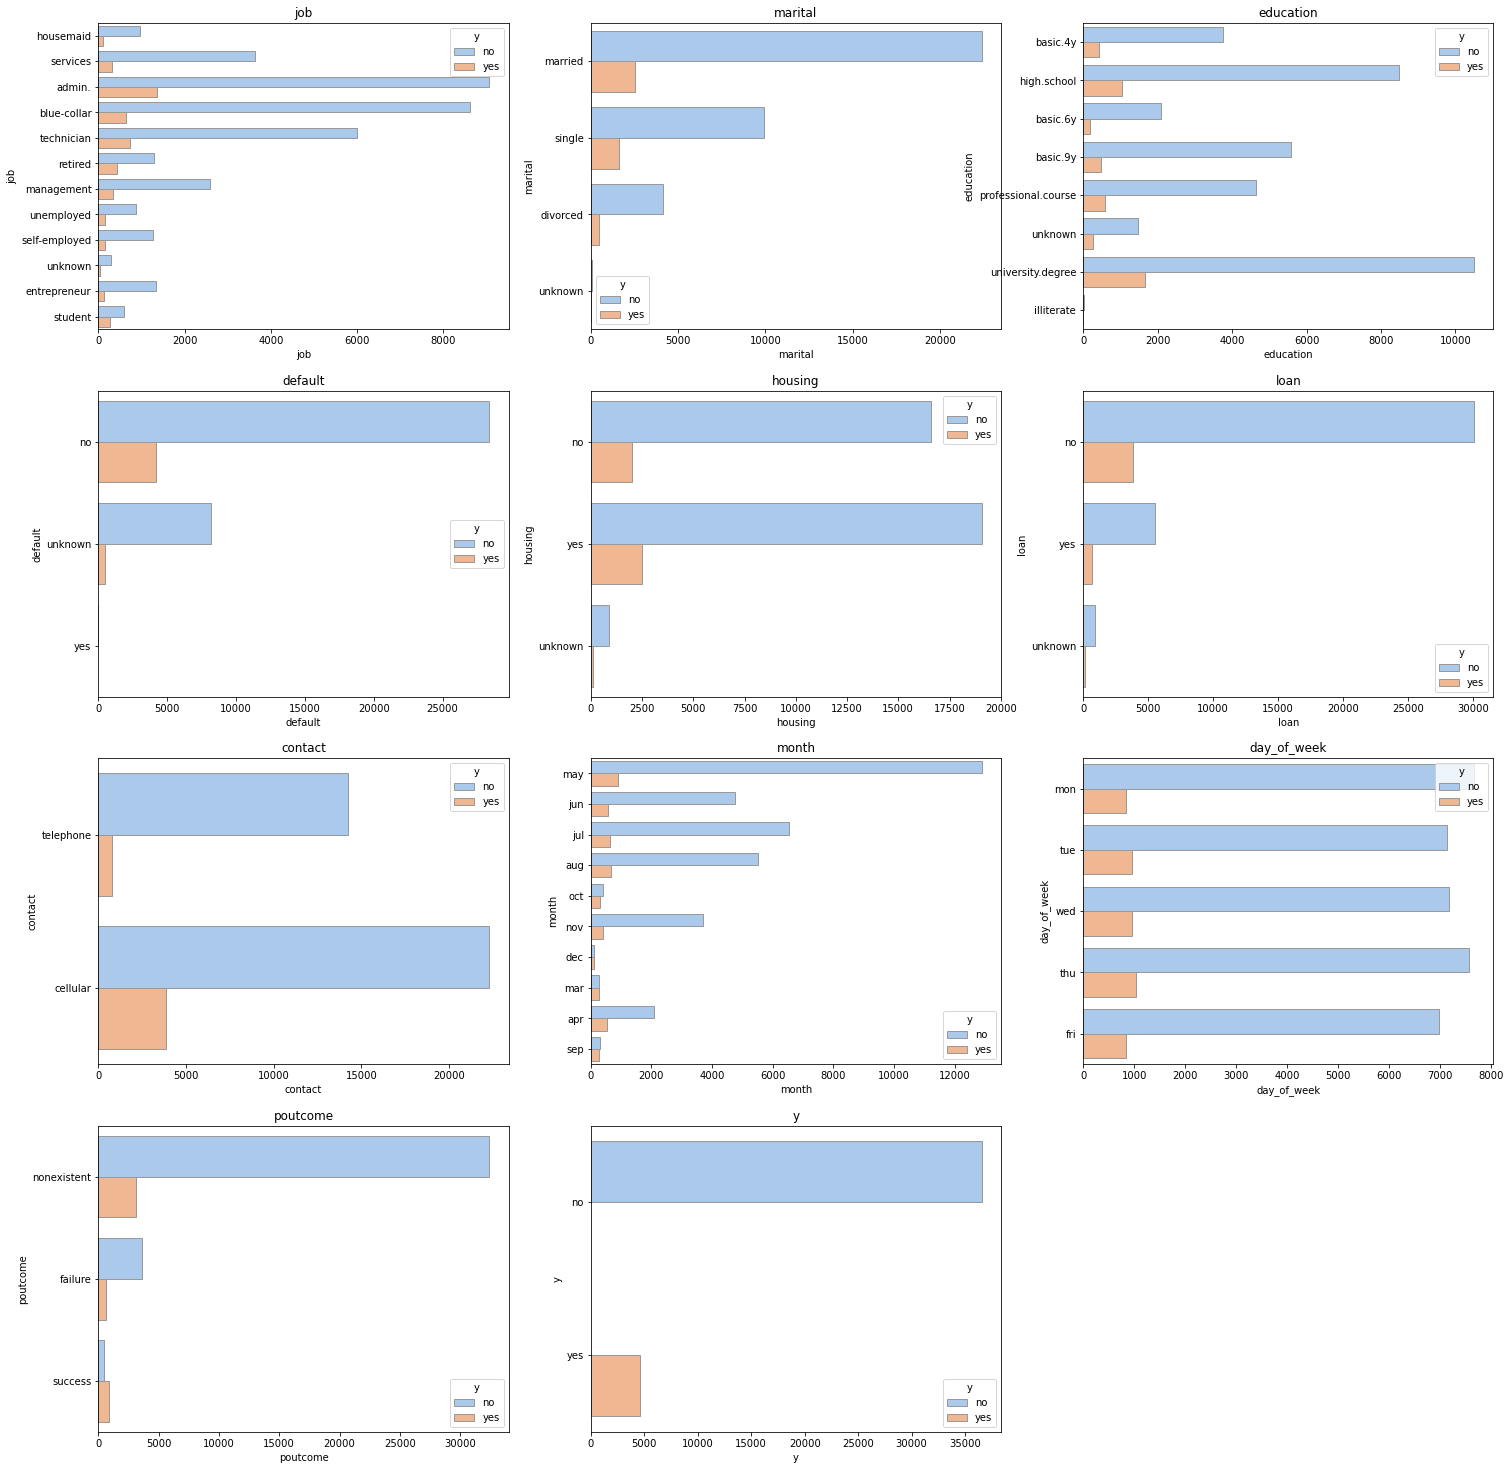

In [18]:
plt.figure(figsize=(25, 80), facecolor='white')
plotnumber =1
for cat_feature in cat_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=cat_feature, hue='y', palette='pastel', edgecolor='.6', data=data)
    plt.xlabel(cat_feature)
    plt.title(cat_feature)
    plotnumber+=1
plt.show()

In [19]:
#Customers who work as admin, technician and blue-collar are more inclined towards a term deposit;
#Married customers have high interest on deposit;
#Customers with university_degree are more inclined towards a term deposit;
#Customers who don't have credit in default are more inclined towards a term deposit;
#During the summer seasons (May to August) customers show high interest to deposit;
#Customers who has personal loan seems to be less interested on deposit;
#Customers who were contacted via 'cellular' are more inclined towards a term deposit.

<AxesSubplot:xlabel='job', ylabel='count'>

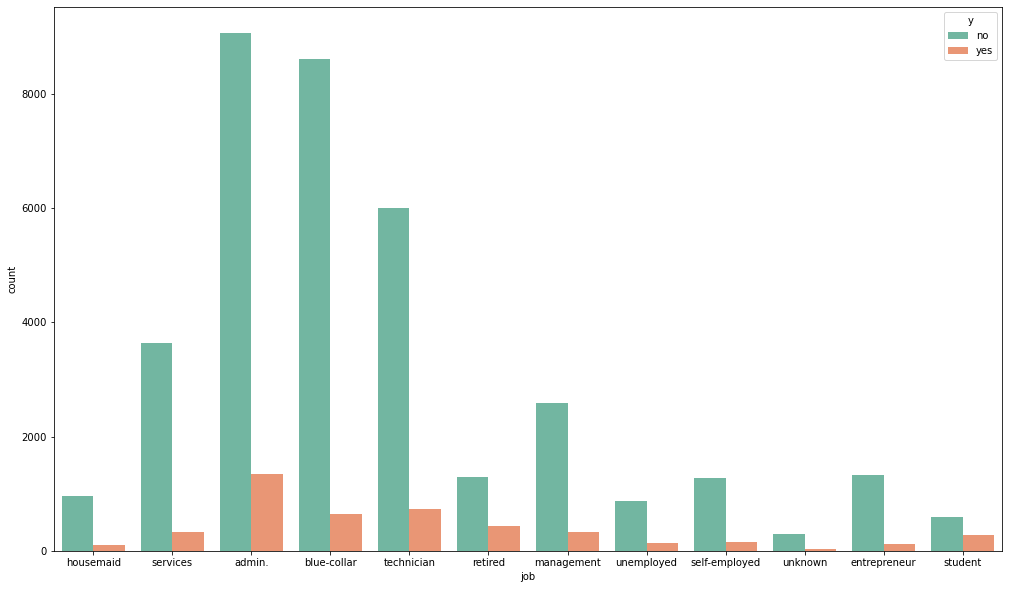

In [22]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['job'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='age', ylabel='count'>

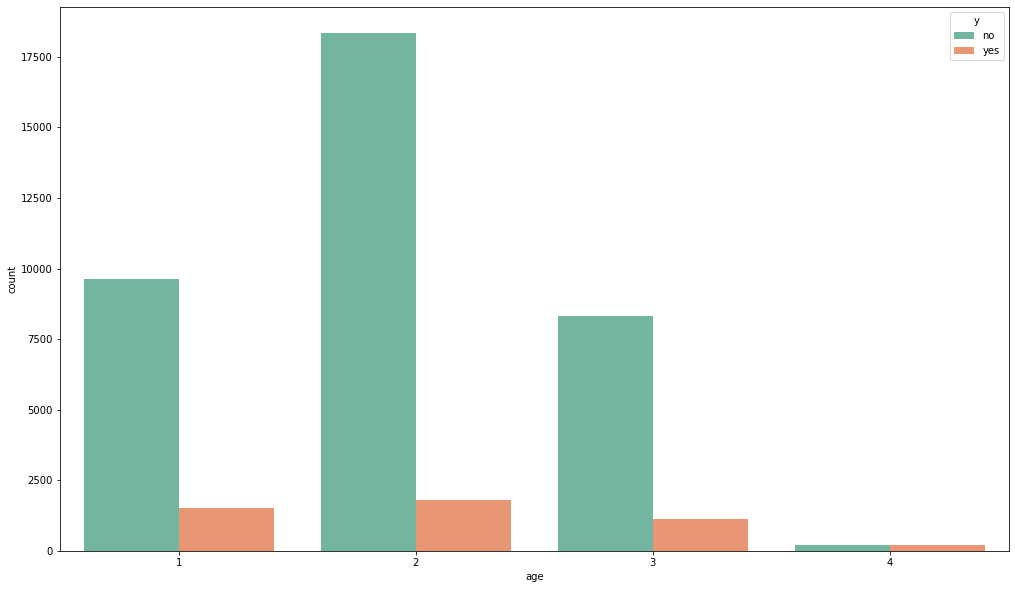

In [23]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['age'],hue=data['y'],palette="Set2")

    #data.loc[data['age'] <= 32, 'age'] = 1
    #data.loc[(data['age'] > 32) & (data['age'] <= 47), 'age'] = 2
    #data.loc[(data['age'] > 47) & (data['age'] <= 70), 'age'] = 3
    #data.loc[(data['age'] > 70) & (data['age'] <= 98), 'age'] = 4

<AxesSubplot:xlabel='marital', ylabel='count'>

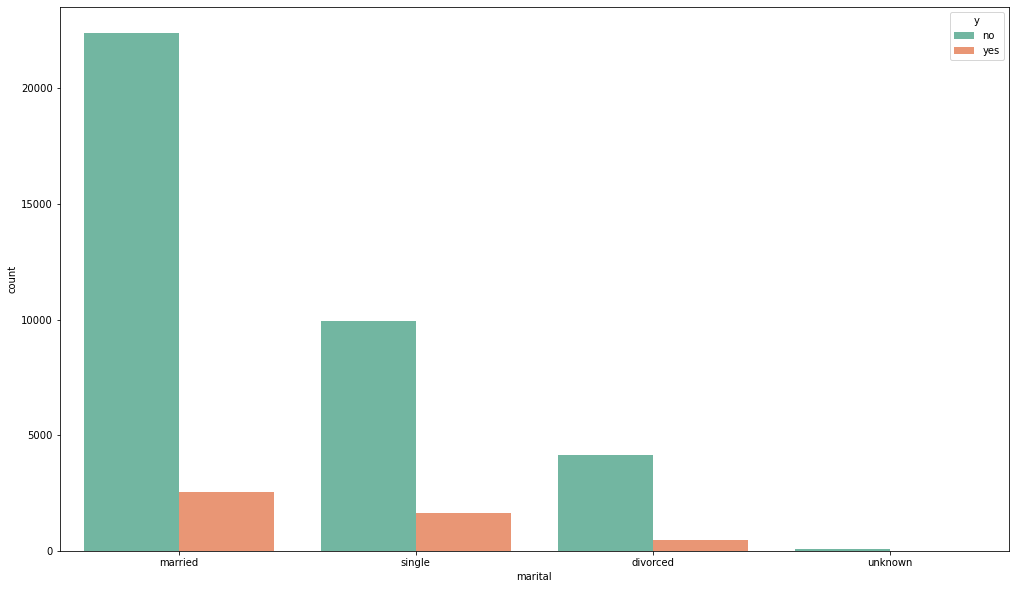

In [24]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['marital'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='education', ylabel='count'>

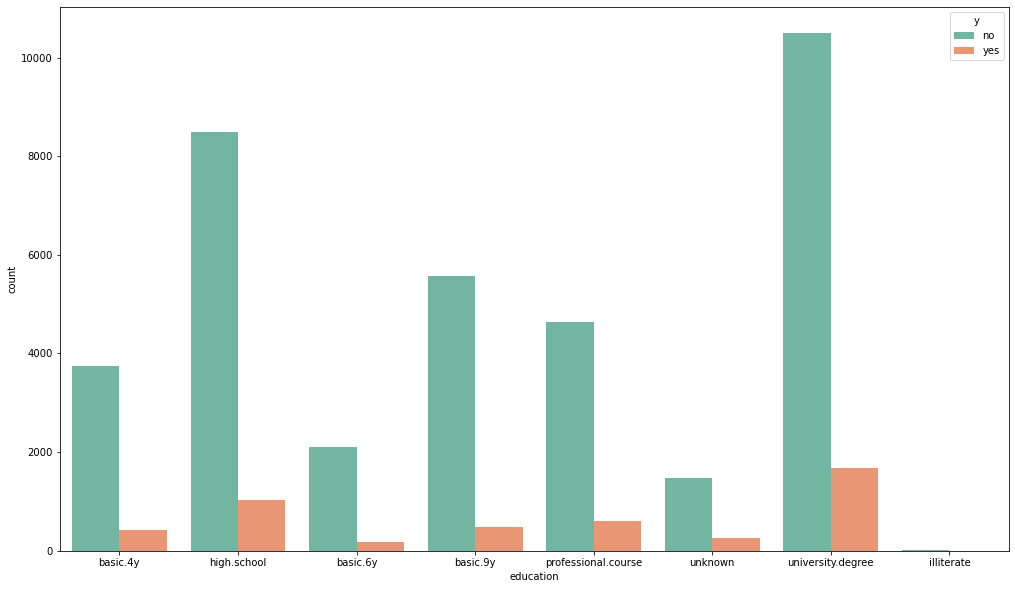

In [25]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['education'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='default', ylabel='count'>

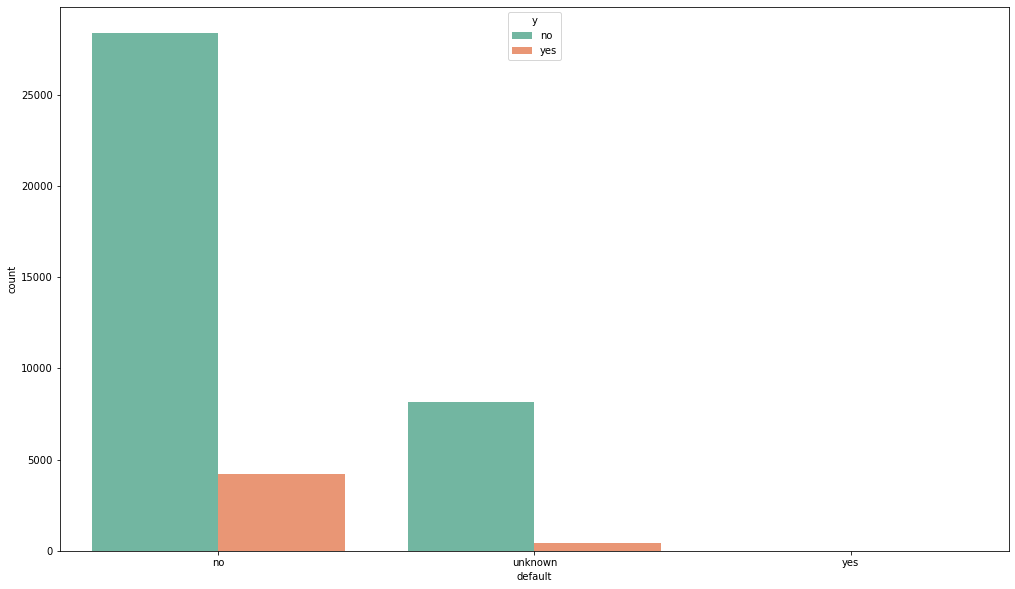

In [26]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['default'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='housing', ylabel='count'>

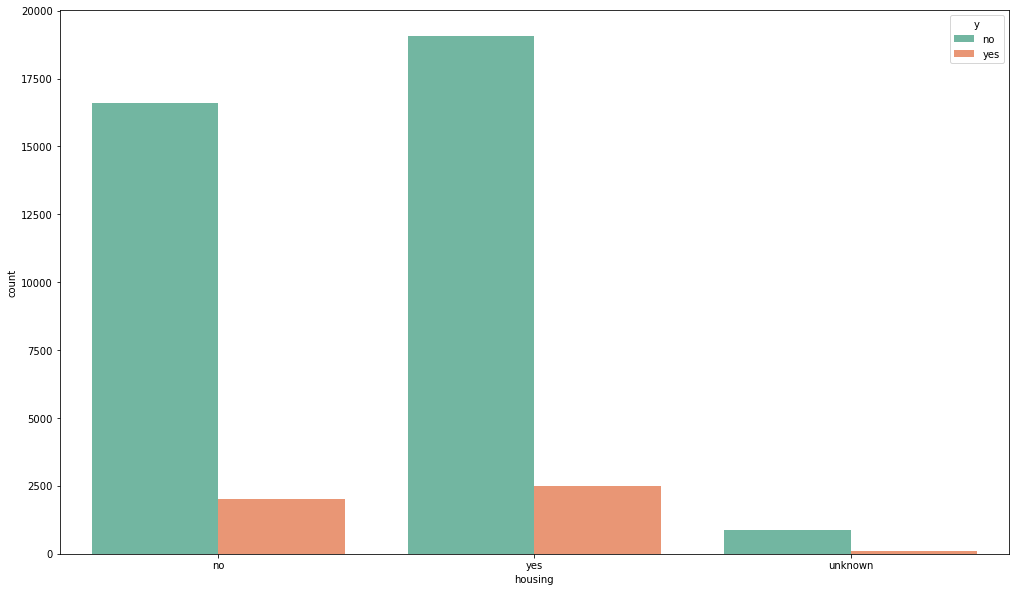

In [27]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['housing'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='loan', ylabel='count'>

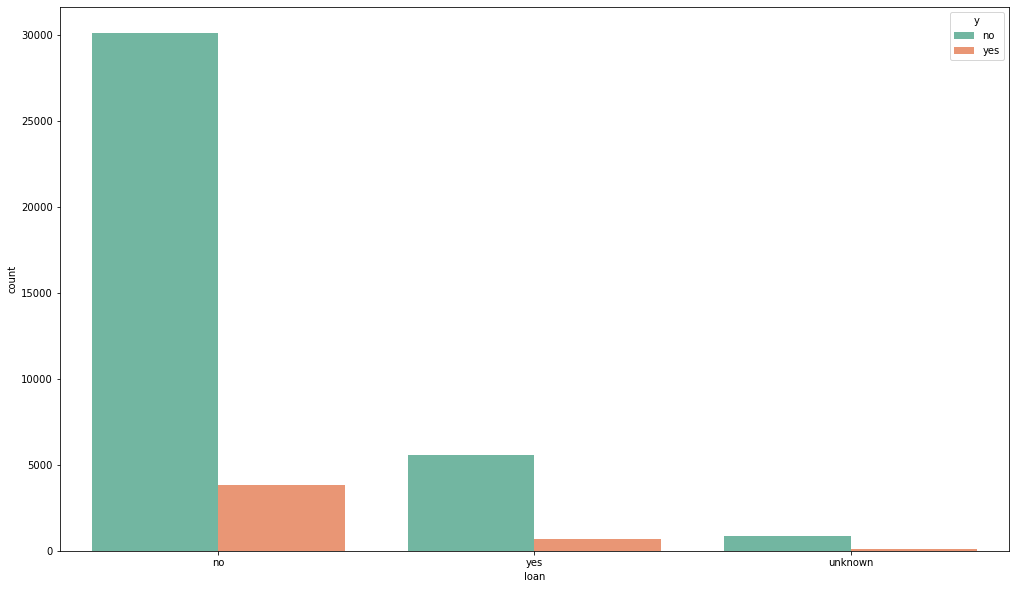

In [28]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['loan'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='contact', ylabel='count'>

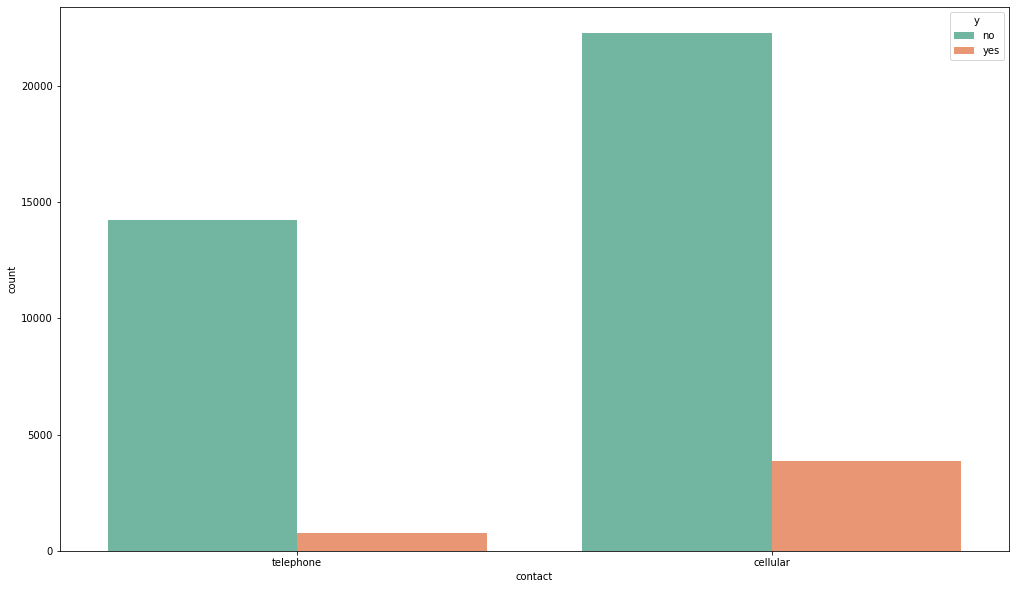

In [29]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['contact'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='month', ylabel='count'>

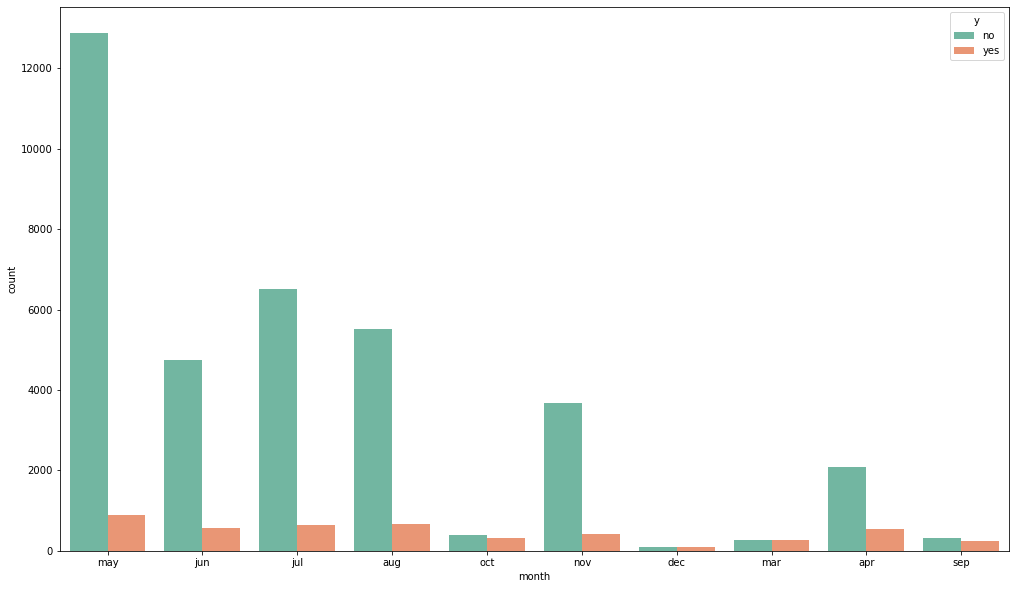

In [30]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['month'],hue=data['y'],palette="Set2")

<AxesSubplot:xlabel='day_of_week', ylabel='count'>

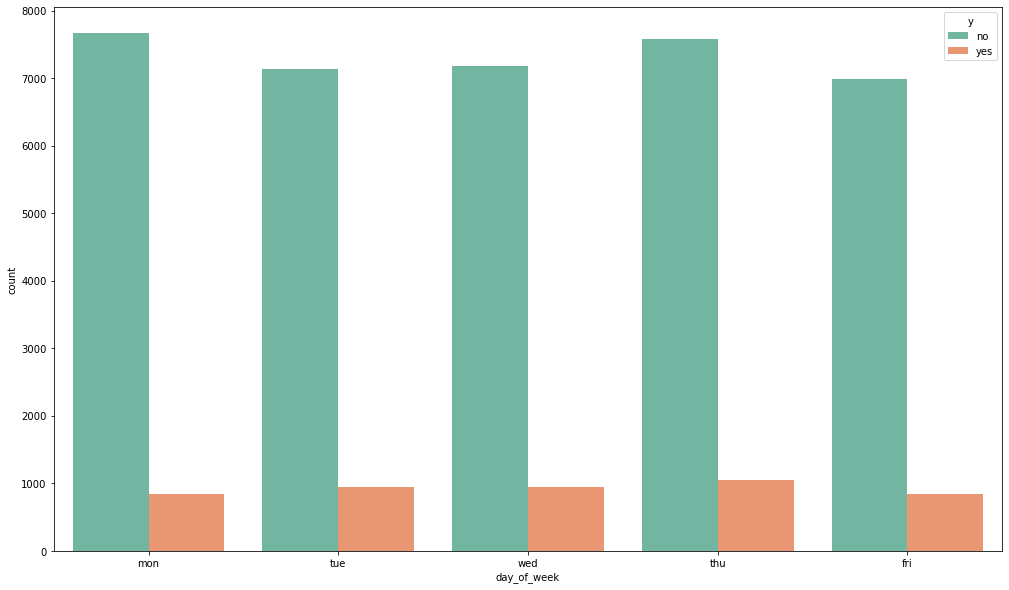

In [31]:
rcParams['figure.figsize'] = 17,10
sns.countplot(x=data['day_of_week'],hue=data['y'],palette="Set2")

### Input Mising Values

In [20]:
data = data.replace('unknown',np.nan)

# Original Data
data["job"]=data["job"].fillna(data["job"].mode()[0])
data["marital"]=data["marital"].fillna(data["marital"].mode()[0])
data["education"]=data["education"].fillna(data["education"].mode()[0])
data["default"]=data["default"].fillna(data["default"].mode()[0])
data["housing"]=data["housing"].fillna(data["housing"].mode()[0])
data["loan"]=data["loan"].fillna(data["loan"].mode()[0])
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [ ]:
lis = []
for col in data.columns:
    lis.append([col, data[col].dtype, sum(data[col].isnull()), 100*(sum(data[col].isnull())/len(data[col])), 
                data[col].nunique()])
pd.DataFrame(lis, columns=['Name', 'Type', 'jml Null', '% Null', 'Unique'])

### Label Encoding

In [33]:
# Original data

from sklearn.preprocessing import LabelEncoder

cat_cols = data.dtypes==object
cat_cols = data.columns[cat_cols].tolist()
le = LabelEncoder()
data[cat_cols] = data[cat_cols].apply(lambda col: le.fit_transform(col))

In [34]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,3,3,1,0,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
1,3,7,1,3,2,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
2,2,7,1,3,0,1,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
3,2,0,1,1,0,0,0,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0
4,3,7,1,3,0,0,1,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191,0


In [35]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [36]:
Data2 = data.drop(labels='y',axis=1)
X = Data2
y = data['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [37]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(X_train, y_train)

RandomForestRegressor()

In [38]:
rf.feature_importances_

array([0.02807764, 0.05134547, 0.02302352, 0.04509474, 0.00863771,
       0.01823175, 0.0145967 , 0.00948408, 0.01735967, 0.04116118,
       0.36659807, 0.0411438 , 0.01715944, 0.01085594, 0.0154099 ,
       0.00397203, 0.01504511, 0.02632088, 0.09047737, 0.156005  ])

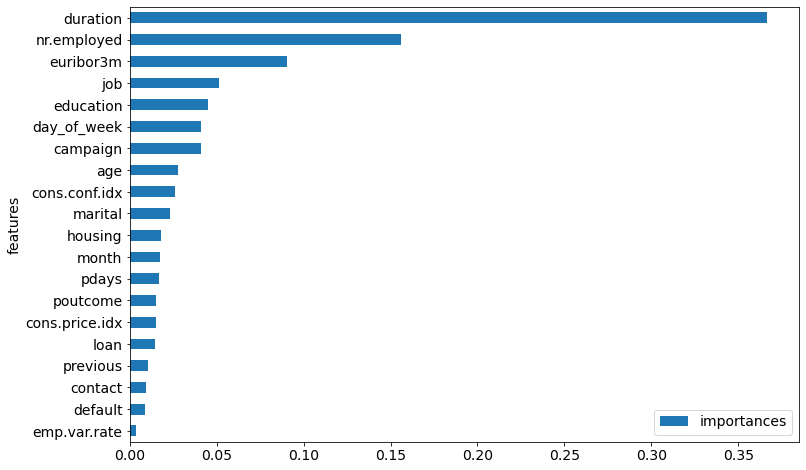

In [39]:
df = pd.DataFrame({'features': ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
                           'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 
                           'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'], 'importances': rf.feature_importances_})
df.sort_values(by= 'importances',inplace=True)
ax = df.plot.barh(x='features', y='importances')

In [40]:
data.drop(labels=['default', 'emp.var.rate', 'contact', 'previous', 'loan', 'cons.price.idx', 'pdays'], axis=1, inplace=True)

### Data Partition

In [41]:
from sklearn.model_selection import train_test_split

##partition data into data training and data testing
train,test = train_test_split(data,test_size = .20 ,random_state = 111)
    
##seperating dependent and independent variables on training and testing data
target_col = ['y']
cols    = [i for i in data.columns if i not in target_col]
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

In [42]:
from imblearn.over_sampling import SMOTE

#handle imbalance class using oversampling minority class with smote method
os = SMOTE(sampling_strategy='minority',random_state = 123,k_neighbors=5)
train_smote_X,train_smote_Y = os.fit_resample(train_X,train_Y)
train_smote_X = pd.DataFrame(data = train_smote_X,columns=cols)
train_smote_Y = pd.DataFrame(data = train_smote_Y,columns=target_col)

In [43]:
#Proportion before smote
train_Y["y"].value_counts()

0    29237
1     3703
Name: y, dtype: int64

In [44]:
#Proportion after smote
train_smote_Y["y"].value_counts()

1    29237
0    29237
Name: y, dtype: int64

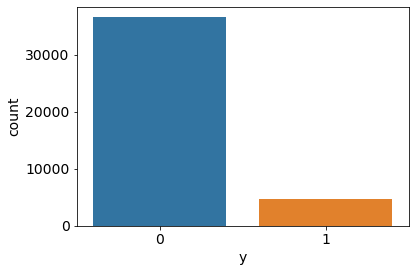

In [45]:
plt.figure(figsize = (6, 4))
sns.countplot(data = data, x = 'y')
plt.tight_layout()

### Model Train

In [46]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, make_scorer, f1_score, roc_auc_score

In [47]:
config = {
    'model': {
        'lgbm': LGBMClassifier(random_state=123),
        'rfc': RandomForestClassifier(random_state=123),
        'xgb': XGBClassifier(random_state=123)
    },
    'param': {
        'lgbm': {
            'learning_rate': [0.005, 0.01, 0.05],
            'n_estimators': [50, 100, 300, 500, 1000],
            'boosting_type' : ['gbdt'],
            'objective' : ['binary'],
            'colsample_bytree' : [0.6],
            'subsample' : [0.02, 0.05],
            'reg_alpha' : [1.6, 2, 5],
            'reg_lambda' : [50]
        },
        'rfc': { 
           'n_estimators' : [800, 1200, 1500],
           'max_features' : ['auto'],
           'criterion' : ['entropy'],
           'min_samples_leaf' : [1], 
           'min_samples_split' : [2],
           'max_depth' : [None]
        },
        'xgb': {'learning_rate' : [0.1],
              'n_estimators' : [300, 500 , 800],
              'max_depth' : [3], 
              'min_child_weight' : [0], 
              'gamma' : [0],
              'subsample' : [0.8],
              'colsample_bytree' : [0.8],
              'objective' : ['binary:logistic'],
              'nthread' : [4],
              'scale_pos_weight' : [1],
              'seed' : [123],
              'eval_metric' : ['aucpr']}
    }
}

### XGBOOST Model

In [48]:
model = 'xgb'

In [49]:
xgb = config['model'][model]
param_grid = config['param'][model]

In [50]:
### from sklearn.model_selection import GridSearchCV
CV_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid, cv= 5, refit = 'recall_score', n_jobs= -1)
CV_xgb.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs...
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8], 'eval_metric': ['aucpr'],
                         'gamma': [0], 'learni

In [51]:
# best hyperparameter
CV_xgb.best_params_

{'colsample_bytree': 0.8,
 'eval_metric': 'aucpr',
 'gamma': 0,
 'learning_rate': 0.1,
 'max_depth': 3,
 'min_child_weight': 0,
 'n_estimators': 800,
 'nthread': 4,
 'objective': 'binary:logistic',
 'scale_pos_weight': 1,
 'seed': 123,
 'subsample': 0.8}

In [52]:
#akurasi model terbaik di data training
CV_xgb.best_score_

0.9229064385378528

#### Evaluation

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
pred_xgb=CV_xgb.predict(test_X)

In [55]:
print("Accuracy for XGB on CV data: ",accuracy_score(test_Y,pred_xgb))

Accuracy for XGB on CV data:  0.8976444876153472


In [56]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(test_Y, pred_xgb)
CF

array([[6749,  551],
       [ 292,  644]], dtype=int64)

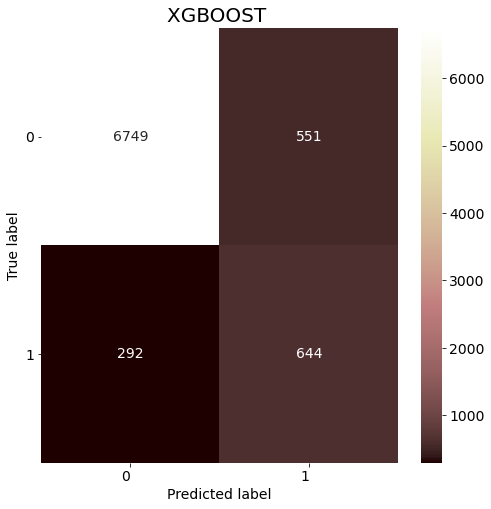

In [57]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_xgb))

# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='pink')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('XGBOOST ', fontsize=20, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [58]:
test_Y.value_counts()

y
0    7300
1     936
dtype: int64

In [59]:
from sklearn.metrics import classification_report
#melihat classification report
target_names = ['No','Yes']
print(classification_report(test_Y, pred_xgb, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.92      0.94      7300
         Yes       0.54      0.69      0.60       936

    accuracy                           0.90      8236
   macro avg       0.75      0.81      0.77      8236
weighted avg       0.91      0.90      0.90      8236



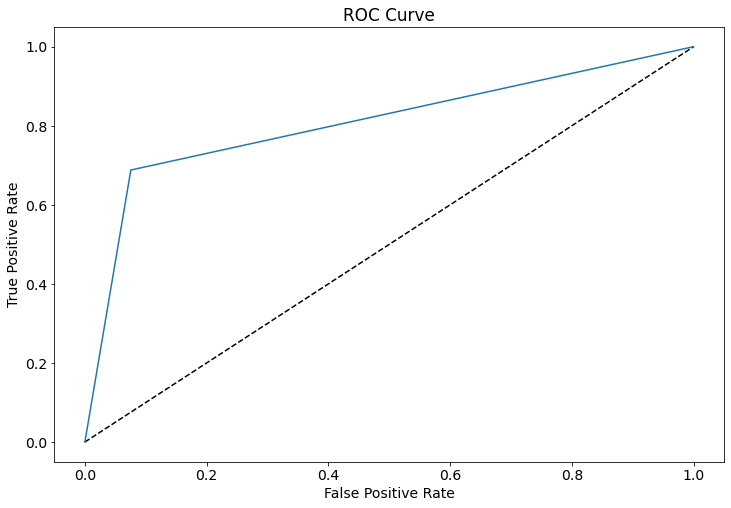

In [60]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_xgb)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [61]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_xgb)

0.8062773679896967

### LGBM Model

In [62]:
sfold = StratifiedKFold(n_splits=10)

In [63]:
model = 'lgbm'

In [64]:
lgbm = config['model'][model]
param_grid = config['param'][model]

In [65]:
CV_lgbm = GridSearchCV(estimator=lgbm, param_grid=param_grid, cv= sfold, scoring=make_scorer(roc_auc_score))
CV_lgbm.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=False),
             estimator=LGBMClassifier(random_state=123),
             param_grid={'boosting_type': ['gbdt'], 'colsample_bytree': [0.6],
                         'learning_rate': [0.005, 0.01, 0.05],
                         'n_estimators': [50, 100, 300, 500, 1000],
                         'objective': ['binary'], 'reg_alpha': [1.6, 2, 5],
                         'reg_lambda': [50], 'subsample': [0.02, 0.05]},
             scoring=make_scorer(roc_auc_score))

In [66]:
# best hyperparameter
CV_lgbm.best_params_

{'boosting_type': 'gbdt',
 'colsample_bytree': 0.6,
 'learning_rate': 0.05,
 'n_estimators': 1000,
 'objective': 'binary',
 'reg_alpha': 1.6,
 'reg_lambda': 50,
 'subsample': 0.02}

In [67]:
#akurasi model terbaik di data training
CV_lgbm.best_score_

0.9354438920903274

#### Evaluation

In [68]:
from sklearn.metrics import confusion_matrix

In [69]:
pred_lgbm=CV_lgbm.predict(test_X)

In [70]:
print("Accuracy for LGBM on CV data: ",accuracy_score(test_Y,pred_lgbm))

Accuracy for LGBM on CV data:  0.9008013598834386


In [71]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(test_Y, pred_lgbm)
CF

array([[6773,  527],
       [ 290,  646]], dtype=int64)

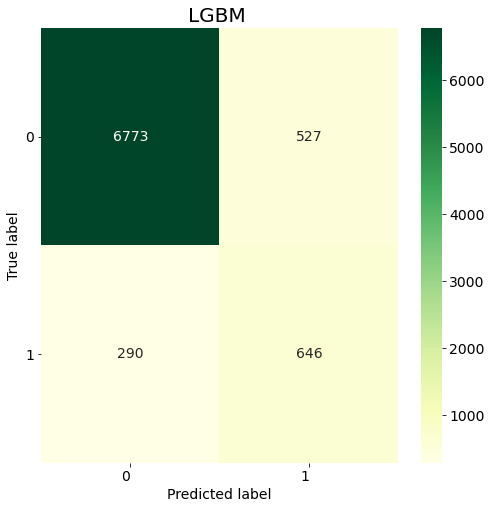

In [72]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_lgbm))

# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGn')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('LGBM ', fontsize=20, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [73]:
test_Y.value_counts()

y
0    7300
1     936
dtype: int64

In [74]:
from sklearn.metrics import classification_report
#melihat classification report
target_names = ['No','Yes']
print(classification_report(test_Y, pred_lgbm, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.93      0.94      7300
         Yes       0.55      0.69      0.61       936

    accuracy                           0.90      8236
   macro avg       0.75      0.81      0.78      8236
weighted avg       0.91      0.90      0.91      8236



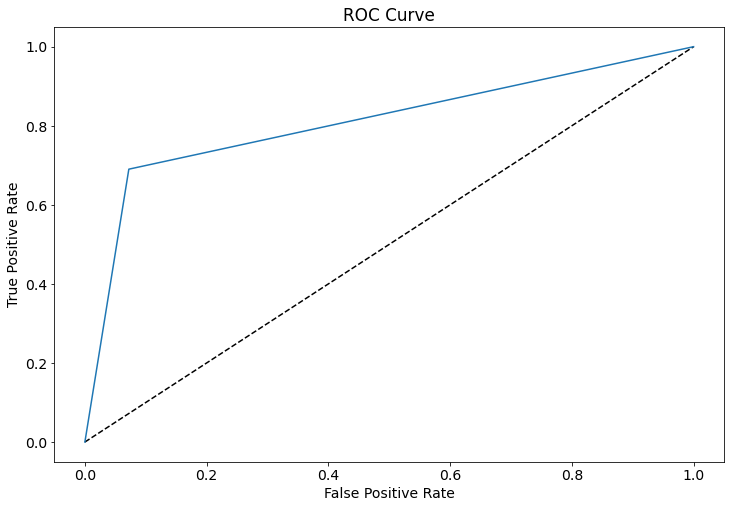

In [75]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_lgbm)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [76]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_lgbm)

0.8089895796745112

### Random Forest Model

In [77]:
model = 'rfc'

In [78]:
rfc = config['model'][model]
param_grid = config['param'][model]

In [79]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 3)
CV_rfc.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\user\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:593: DataConversionWarning: A column-vector y was pa

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['entropy'], 'max_depth': [None],
                         'max_features': ['auto'], 'min_samples_leaf': [1],
                         'min_samples_split': [2],
                         'n_estimators': [800, 1200, 1500]})

In [80]:
#best hyperparameter
CV_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [81]:
#akurasi model terbaik di data training
CV_rfc.best_score_

0.9376480424687775

#### Evaluation

In [82]:
#memprediksi data testing
pred_rfc=CV_rfc.predict(test_X)

In [83]:
#akurasi di data testing
print("Accuracy for Random Forest on CV data: ",accuracy_score(test_Y,pred_rfc))

Accuracy for Random Forest on CV data:  0.9034725594949005


In [84]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(test_Y, pred_rfc)
CF

array([[6796,  504],
       [ 291,  645]], dtype=int64)

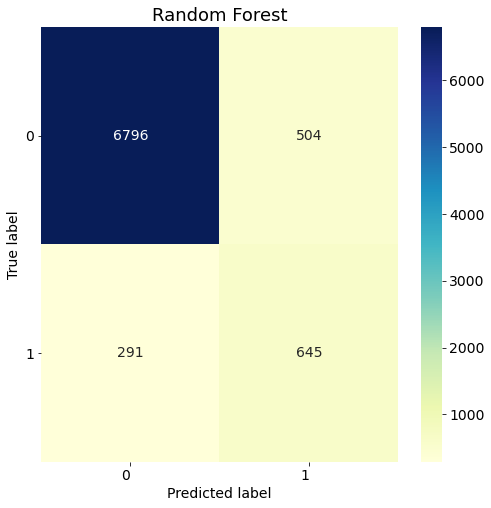

In [85]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_rfc))
                                   
# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='YlGnBu')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Random Forest', fontsize=18, color='Black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [86]:
test_Y.value_counts()

y
0    7300
1     936
dtype: int64

In [87]:
from sklearn.metrics import classification_report
#melihat classification report
target_names = ['No','Yes']
print(classification_report(test_Y, pred_rfc, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.93      0.94      7300
         Yes       0.56      0.69      0.62       936

    accuracy                           0.90      8236
   macro avg       0.76      0.81      0.78      8236
weighted avg       0.91      0.90      0.91      8236



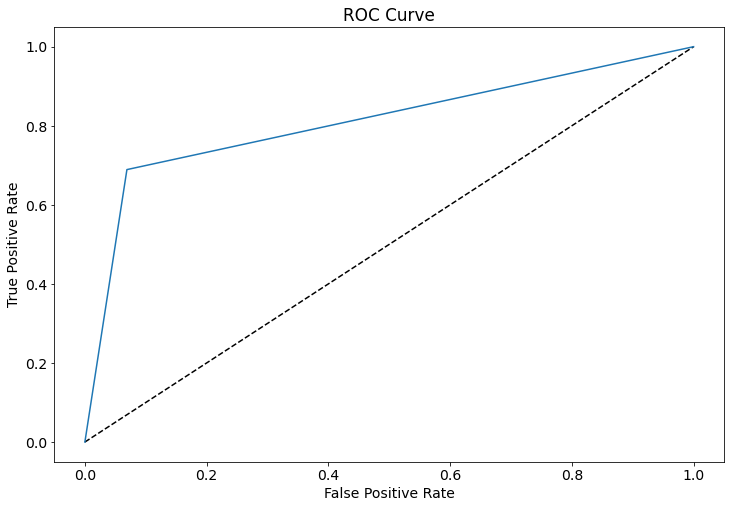

In [88]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_rfc)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [89]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_rfc)

0.8100307341060766

### Regresi Logistik Model

In [90]:
import statsmodels.api as sm 
exog = sm.add_constant(train_smote_X)
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323389
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                58474
Model:                          Logit   Df Residuals:                    58460
Method:                           MLE   Df Model:                           13
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.5334
Time:                        19:55:30   Log-Likelihood:                -18910.
converged:                       True   LL-Null:                       -40531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           105.4085      2.829     37.255      0.000      99.863     110.954
age              -0.

In [133]:
exog = sm.add_constant(train_smote_X.drop(labels="education",axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323389
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                58474
Model:                          Logit   Df Residuals:                    58461
Method:                           MLE   Df Model:                           12
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.5334
Time:                        21:05:10   Log-Likelihood:                -18910.
converged:                       True   LL-Null:                       -40531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1834      0.055     39.951      0.000       2.076       2.290
age              -0.

In [134]:
exog = sm.add_constant(train_smote_X.drop(labels=["education", "job"],axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323406
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                58474
Model:                          Logit   Df Residuals:                    58462
Method:                           MLE   Df Model:                           11
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.5334
Time:                        21:05:52   Log-Likelihood:                -18911.
converged:                       True   LL-Null:                       -40531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1644      0.053     40.945      0.000       2.061       2.268
age              -0.

In [135]:
exog = sm.add_constant(train_smote_X.drop(labels=["education", "euribor3m", "job"],axis=1))
log_reg = sm.Logit(train_smote_Y, exog).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.323424
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                58474
Model:                          Logit   Df Residuals:                    58463
Method:                           MLE   Df Model:                           10
Date:                Sat, 03 Jul 2021   Pseudo R-squ.:                  0.5334
Time:                        21:06:18   Log-Likelihood:                -18912.
converged:                       True   LL-Null:                       -40531.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             2.1850      0.051     42.862      0.000       2.085       2.285
age              -0.

#### Evaluation

In [137]:
pred_RL=log_reg.predict(sm.add_constant(test_X.drop(labels=["education","euribor3m", "job"],axis=1)))

In [138]:
from sklearn.metrics import accuracy_score
print("Accuracy for Logreg on test data: ",accuracy_score(test_Y,np.round(pred_RL)))

Accuracy for Logreg on test data:  0.8549052938319572


In [139]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, np.round(pred_RL))
CF

array([[6322,  978],
       [ 217,  719]], dtype=int64)

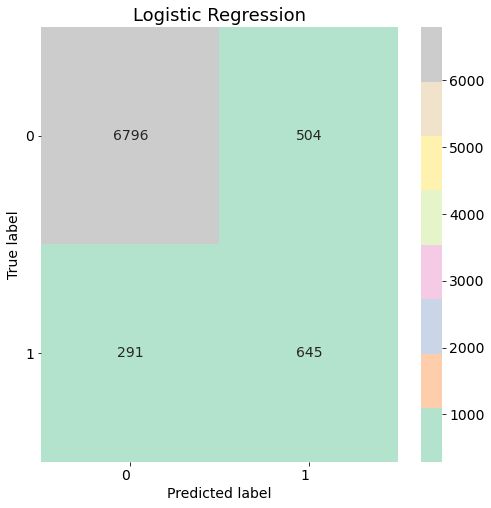

In [140]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_rfc))
                                   
# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Pastel2')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('Logistic Regression', fontsize=18, color='Black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [141]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, np.round(pred_RL), target_names=target_names))

              precision    recall  f1-score   support

          No       0.97      0.87      0.91      7300
         Yes       0.42      0.77      0.55       936

    accuracy                           0.85      8236
   macro avg       0.70      0.82      0.73      8236
weighted avg       0.91      0.85      0.87      8236



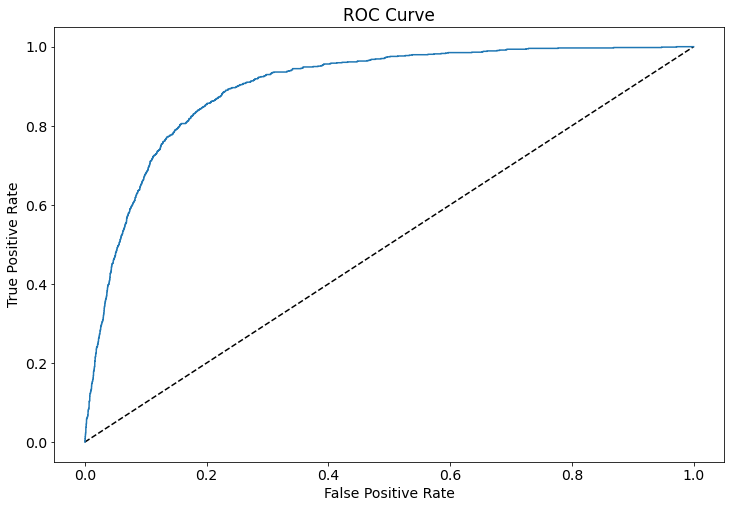

In [142]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_RL)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_RL)

0.8972285153963236

### KNN Model

In [99]:
Num_cols = [col for col, dtype in data.dtypes.items() if dtype == 'int64' or dtype == 'float64']

In [100]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X[Num_cols]=ss.fit_transform(train_smote_X[Num_cols])
test_X[Num_cols]=ss.transform(test_X[Num_cols])

<ipython-input-100-c62c0f7bab48>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X[Num_cols]=ss.transform(test_X[Num_cols])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


In [101]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
knnc=KNeighborsClassifier()
param_grid_KNN = { 
    'n_neighbors': [2,3,4,5,6],
    'metric': ['euclidean','manhatan']
}

In [102]:
from sklearn.model_selection import GridSearchCV
CV_knnc = GridSearchCV(estimator=knnc, param_grid=param_grid_KNN, cv= 2)
CV_knnc.fit(train_smote_X, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\user\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatan'],
                         'n_neighbors': [2, 3, 4, 5, 6]})

In [103]:
#best hyperparameter
CV_knnc.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [104]:
#akurasi model terbaik di data training
CV_knnc.best_score_

0.9001607552074427

#### Evaluation

In [105]:
pred_KNN=CV_knnc.predict(test_X)

In [106]:
print("Accuracy for KNN on CV data: ",accuracy_score(test_Y,pred_KNN))

Accuracy for KNN on CV data:  0.8621903836813988


In [107]:
from sklearn.metrics import confusion_matrix
#membuat confusion matrix
CF=confusion_matrix(test_Y,pred_KNN)
CF

array([[6500,  800],
       [ 335,  601]], dtype=int64)

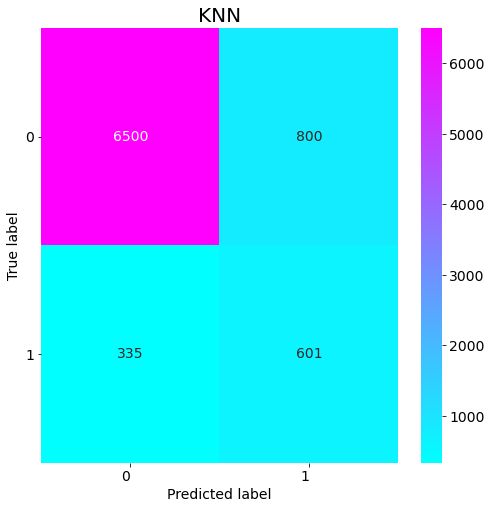

In [108]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_KNN))

# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='cool')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('KNN', fontsize=20, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [109]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred_KNN, target_names=target_names))

              precision    recall  f1-score   support

          No       0.95      0.89      0.92      7300
         Yes       0.43      0.64      0.51       936

    accuracy                           0.86      8236
   macro avg       0.69      0.77      0.72      8236
weighted avg       0.89      0.86      0.87      8236



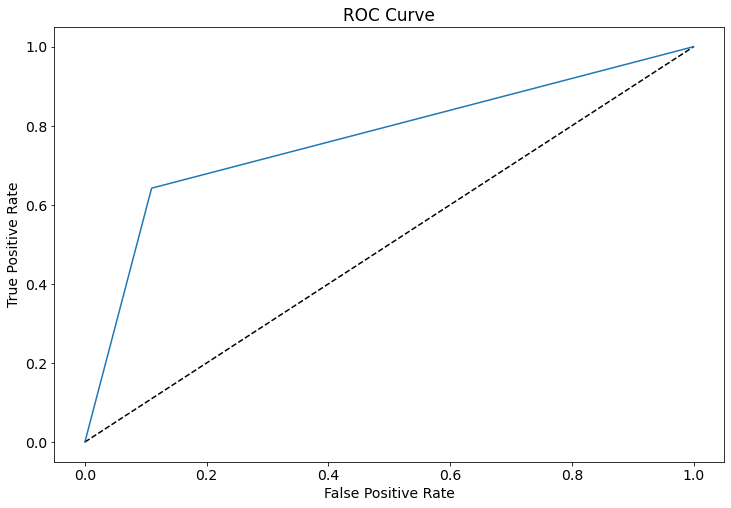

In [110]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_KNN)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [111]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_KNN)

0.7662524879990634

### Feature Scaling Khusus SVM

In [112]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_smote_X_2=train_smote_X
test_X_2=test_X
train_smote_X_2[Num_cols]=ss.fit_transform(train_smote_X_2[Num_cols])
test_X_2[Num_cols]=ss.transform(test_X_2[Num_cols])

<ipython-input-112-97abd6240fe6>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_X_2[Num_cols]=ss.transform(test_X_2[Num_cols])
C:\Users\user\anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


### Support Vector Machine Model

In [113]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svm=SVC()
param_grid_SVM = { 
    "C" : [0.1, 1],
    "gamma" : [0.1, 1],
    "kernel":["linear","rbf"]
}

In [114]:
from sklearn.model_selection import GridSearchCV
CV_svm = GridSearchCV(estimator=svm, param_grid=param_grid_SVM, cv= 2)
CV_svm.fit(train_smote_X_2, train_smote_Y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel

GridSearchCV(cv=2, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [0.1, 1],
                         'kernel': ['linear', 'rbf']})

In [115]:
CV_svm.best_params_

{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}

#### Evaluation

In [116]:
pred_SVM=CV_svm.predict(test_X_2)

In [117]:
from sklearn.metrics import accuracy_score
print("Accuracy for SVM on test data: ",accuracy_score(test_Y,pred_SVM))

Accuracy for SVM on test data:  0.8743322000971345


In [118]:
from sklearn.metrics import confusion_matrix
CF=confusion_matrix(test_Y, pred_SVM)
CF

array([[6514,  786],
       [ 249,  687]], dtype=int64)

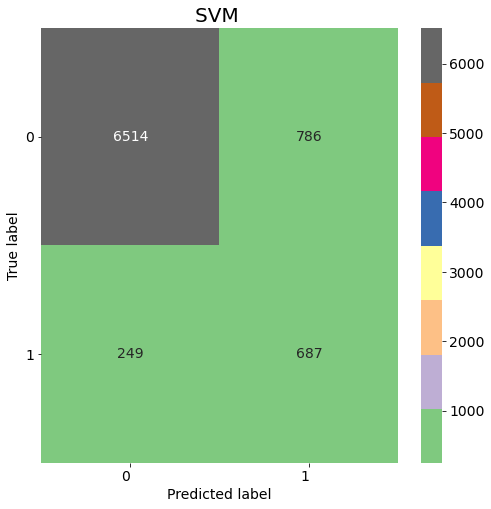

In [119]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_SVM))

# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Accent')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('SVM ', fontsize=20, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [120]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y,pred_SVM, target_names=target_names))

              precision    recall  f1-score   support

          No       0.96      0.89      0.93      7300
         Yes       0.47      0.73      0.57       936

    accuracy                           0.87      8236
   macro avg       0.71      0.81      0.75      8236
weighted avg       0.91      0.87      0.89      8236



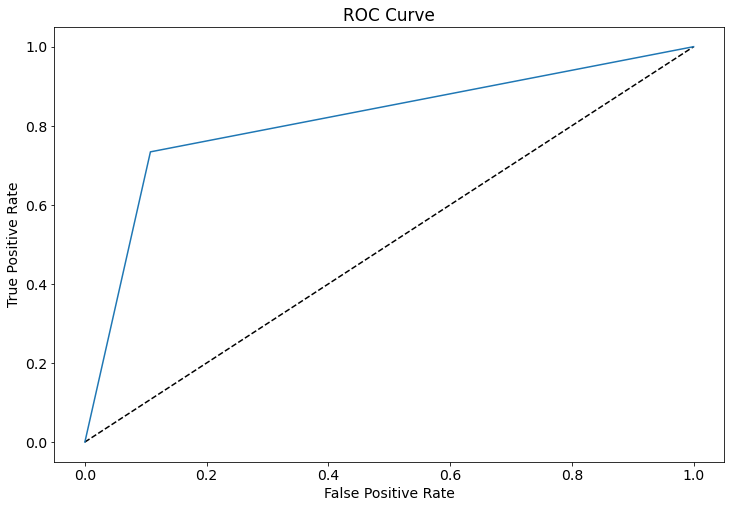

In [121]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_SVM)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [122]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_SVM)

0.8131515630488234

### Decision Tree Model

In [123]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier()
param_grid_DT = {"criterion":["gini","entropy"],
              'min_samples_split': [2,5,10,50,100],
             "max_depth":[3,4,5,6,7,8,9,10]}

In [124]:
CV_DT = GridSearchCV(estimator=dtc, param_grid=param_grid_DT, cv= 2)
CV_DT.fit(train_smote_X, train_smote_Y)

GridSearchCV(cv=2, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'min_samples_split': [2, 5, 10, 50, 100]})

In [125]:
CV_DT.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 2}

In [126]:
pred_DT=CV_DT.predict(test_X)

In [127]:
print("Accuracy for Decision Tree on CV data: ",accuracy_score(test_Y,pred_DT))

Accuracy for Decision Tree on CV data:  0.87178241864983


In [128]:
CF=confusion_matrix(test_Y, pred_DT)
CF

array([[6477,  823],
       [ 233,  703]], dtype=int64)

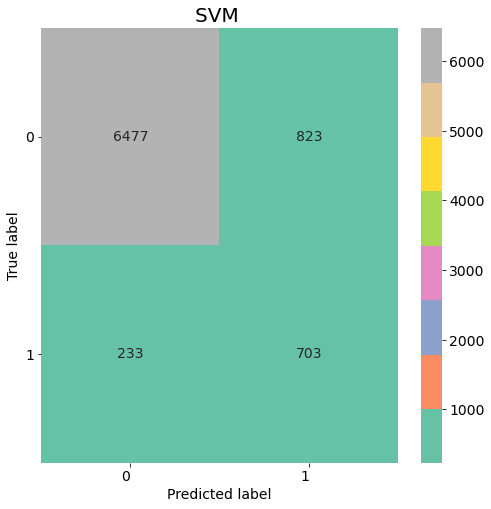

In [129]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
import seaborn as sns

# Form confusion matrix as a DataFrame
confusion_matrix_df = pd.DataFrame(confusion_matrix(test_Y, pred_DT))

# Plot confusion matrix
plt.figure(figsize = (8,8))
heatmap = sns.heatmap(confusion_matrix_df, annot=True, annot_kws={'size': 14}, fmt='d', cmap='Set2')
heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=0, ha='right', fontsize=14)

plt.title('SVM ', fontsize=20, color='black')
plt.ylabel('True label', fontsize=14)
plt.xlabel('Predicted label', fontsize=14)
plt.show()

In [130]:
from sklearn.metrics import classification_report
target_names = ['No','Yes']
print(classification_report(test_Y, pred_DT, target_names=target_names))

              precision    recall  f1-score   support

          No       0.97      0.89      0.92      7300
         Yes       0.46      0.75      0.57       936

    accuracy                           0.87      8236
   macro avg       0.71      0.82      0.75      8236
weighted avg       0.91      0.87      0.88      8236



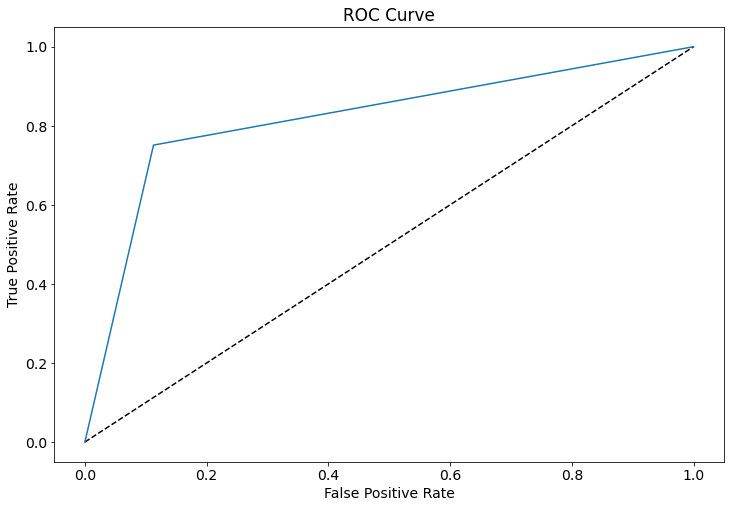

In [131]:
from sklearn.metrics import roc_curve
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(test_Y, pred_DT)
# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [132]:
from sklearn.metrics import roc_auc_score
roc_auc_score(test_Y,pred_DT)

0.8191643250204894